In [ ]:
from google.colab import files
uploaded=files.upload()

Saving movies (2).csv to movies (2).csv
Saving ratings (2).csv to ratings (2).csv


In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ratings=pd.read_csv('ratings (2).csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
movies=pd.read_csv('movies (2).csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [ ]:
#these two datasets are containing same column names 'movie id' so we can merge the two datasets 
#we have to therefore work with merge option which is available in pandas as buit in function

In [ ]:
df=pd.merge(ratings,movies,on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


In [ ]:
#the first thing we can start is to create a data frame which will tell us the average ratings and no. of ratings a movie got
#for this we need the rating column and title name

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Burn Up! (1991)                                                    5.0
Absolute Giganten (1999)                                           5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)                   5.0
Erik the Viking (1989)                                             5.0
Reality (2014)                                                     5.0
                                                                  ... 
End of Summer, The (Early Autumn) (Kohayagawa-ke no aki) (1961)    0.5
Beverly Hills Chihuahua (2008)                                     0.5
Road Games (a.k.a. Roadgames) (1981)                               0.5
Roadkill (a.k.a. Roadkill: Move or Die) (1989)                     0.5
Giant Mechanical Man, The (2012)                                   0.5
Name: rating, Length: 9064, dtype: float64

In [ ]:
#now we have to create one new dataframe rating on which we group the movies with their mean or average rating

In [ ]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [ ]:
#from abpve example we received movie with rating but how many votes a movie received, we didnt get that
#for analysis purpose we need total no. of counts too

In [ ]:
rating['n_rating'] = pd.DataFrame(df.groupby('title')['rating'].mean())
rating

,rating,n_rating
title,,
"""Great Performances"" Cats (1998)",1.750000,1.750000
$9.99 (2008),3.833333,3.833333
'Hellboy': The Seeds of Creation (2004),2.000000,2.000000
'Neath the Arizona Skies (1934),0.500000,0.500000
'Round Midnight (1986),2.250000,2.250000
...,...,...
xXx (2002),2.478261,2.478261
xXx: State of the Union (2005),1.000000,1.000000
¡Three Amigos! (1986),3.258065,3.258065


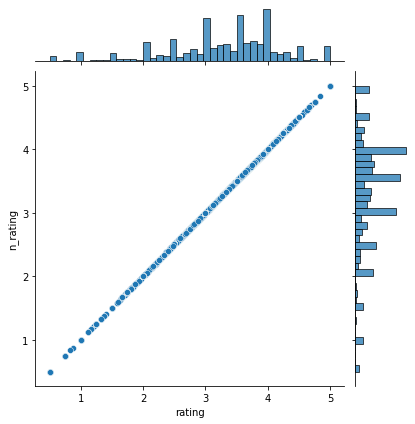

In [ ]:
sns.jointplot(x='rating',y='n_rating',data=rating)

In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [ ]:
#lets try to create a matrix (index and columns)
#index-user id and columns-title
#both will be filled by rating

In [ ]:
rating_matrix=df.pivot_table(index='userId',
                            columns='title',
                            values='rating')
#if any data is missing at the time of creation of new dataframe, it will be replaced by NaN

In [ ]:
rating_matrix

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Attitudes (2001),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),12:08 East of Bucharest (A fost sau n-a fost?) (2006),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",...,Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zardoz (1974),Zathura (2005),Zatoichi on the Road (Zatôichi kenka-tabi) (Zatôichi 5) (1963),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zenon: Girl of the 21st Century (1999),Zenon: The Zequel (2001),Zenon: Z3 (2004),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zerophilia (2005),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoot Suit (1981),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
rating.sort_values('n_rating',ascending=False,).head(15)

,rating,n_rating
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,5.0
Alien Escape (1995),5.0,5.0
Boiling Point (1993),5.0,5.0
Bone Tomahawk (2015),5.0,5.0
Borgman (2013),5.0,5.0
Survive and Advance (2013),5.0,5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0,5.0
"Last Dragon, The (1985)",5.0,5.0
Boy Crazy (2009),5.0,5.0


In [ ]:
#now trying with a movie

In [ ]:
movies[movies['title']=='Crow: Salvation, The (2000)']

,movieId,title,genres
2846,3563,"Crow: Salvation, The (2000)",Action|Horror


In [ ]:
#lets try to match rating_matrix

In [ ]:
user_ratings = rating_matrix['Crow: Salvation, The (2000)']
user_ratings

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
667   NaN
668   NaN
669   NaN
670   NaN
671   NaN
Name: Crow: Salvation, The (2000), Length: 671, dtype: float64

In [ ]:
#trying to find whether the movie is correlated with other movies or not

In [ ]:
similar_to_cs=rating_matrix.corrwith(user_ratings)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_cs

title
"Great Performances" Cats (1998)            NaN
$9.99 (2008)                                NaN
'Hellboy': The Seeds of Creation (2004)     NaN
'Neath the Arizona Skies (1934)             NaN
'Round Midnight (1986)                      NaN
                                             ..
xXx (2002)                                  NaN
xXx: State of the Union (2005)              NaN
¡Three Amigos! (1986)                       NaN
À nous la liberté (Freedom for Us) (1931)   NaN
İtirazım Var (2014)                         NaN
Length: 9064, dtype: float64

In [ ]:
#we need to clean the data using dropna
#we can create a dataframe instead of s series so that it will look simple for assessment

In [ ]:
corr_cs=pd.DataFrame(similar_to_cs,columns=['correlation'])
corr_cs

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN
...,...
xXx (2002),NaN
xXx: State of the Union (2005),NaN
¡Three Amigos! (1986),NaN


In [ ]:
corr_cs.dropna(inplace=True)
corr_cs

,correlation
title,
"13th Warrior, The (1999)",-1.0
Air Force One (1997),1.0
American Beauty (1999),-1.0
Arlington Road (1999),-1.0
As Good as It Gets (1997),-1.0
...,...
William Shakespeare's Romeo + Juliet (1996),-1.0
Willow (1988),-1.0
Willy Wonka & the Chocolate Factory (1971),1.0


In [ ]:
#already we received genre wise matching but recommended movies got rating itself like 1 start and all

In [ ]:
corr_cs.sort_values('correlation',ascending=False)

,correlation
title,
First Knight (1995),1.0
Magnolia (1999),1.0
Air Force One (1997),1.0
Final Destination (2000),1.0
"General's Daughter, The (1999)",1.0
...,...
Office Space (1999),-1.0
Young Guns II (1990),-1.0
Pecker (1998),-1.0


In [ ]:
corr_cs=corr_cs.join(rating['n_rating'])
corr_cs

,correlation,n_rating
title,,
"13th Warrior, The (1999)",-1.0,2.900000
Air Force One (1997),1.0,3.264286
American Beauty (1999),-1.0,4.236364
Arlington Road (1999),-1.0,3.513889
As Good as It Gets (1997),-1.0,3.722222
...,...,...
William Shakespeare's Romeo + Juliet (1996),-1.0,3.525862
Willow (1988),-1.0,3.202381
Willy Wonka & the Chocolate Factory (1971),1.0,3.753378
